# Introducción
## El proyecto se centra en analizar una base de datos de autos usados con el objetivo de identificar patrones y tendencias que puedan ayudar a responder preguntas comunes sobre el mercado de autos usados. Este análisis es esencial para concesionarios, compradores y vendedores que buscan tomar decisiones informadas sobre la compra y venta de vehículos, optimizando así la asignación de recursos y maximizando el valor de las transacciones.
## La base de datos contiene información sobre autos usados que incluye variables como la marca, el modelo, el año de fabricación, el kilometraje, el tipo de transmisión, el tipo de combustible y el precio de venta. 
## El objetivo de este análisis es visualizar cómo estos diferentes factores pueden influir en la demanda de autos usados y proporcionar insights valiosos para la toma de decisiones en el mercado automotriz.


# Descripción del problema
## La problemática principal que se aborda en este proyecto es la identificación de las marcas y modelos de autos que tienen mayor demanda y cómo diferentes factores, como el tipo de transmisión, el año de fabricación, el kilometraje y el tipo de combustible, influyen en esta demanda. Los concesionarios y vendedores de autos usados deben gestionar el inventario y las estrategias de marketing basándose en estos factores para satisfacer las necesidades del mercado y mejorar las ventas.

# DataSet
## https://www.kaggle.com/datasets/mohitkumar282/used-car-dataset

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time

In [60]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\Urano\\Downloads\\archive\\dataset.csv")

In [4]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [5]:
df.isnull().sum()
#tiene valores nulos  pero en este caso sirven para saber que un auto es usado o no porque se encuentra en la columna "kilometros manejados"


Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [7]:
#limpiar datos para que queden bien para analizar

# Convertir las columnas a cadenas
df['kmDriven'] = df['kmDriven'].astype(str)
df['AskPrice'] = df['AskPrice'].astype(str)

# Limpiar los datos (eliminar caracteres no deseados)
df['kmDriven'] = df['kmDriven'].str.replace(r'[^\d.]', '', regex=True)
df['AskPrice'] = df['AskPrice'].str.replace(r'[^\d]', '', regex=True)

# Reemplazar valores vacíos con NaN y convertir a float
df['kmDriven'] = df['kmDriven'].replace('', np.nan).astype(float)
df['AskPrice'] = df['AskPrice'].replace('', np.nan).astype(float)

# Reemplazar valores NaN con el promedio de la columna , fue elegido el promedio arbitrariamente porque me parecio lo mejor
df['kmDriven'] = df['kmDriven'].fillna(df['kmDriven'].mean())
df['AskPrice'] = df['AskPrice'].fillna(df['AskPrice'].mean())

# ¿Es mas caro un auto con trasmisión automática o manual?


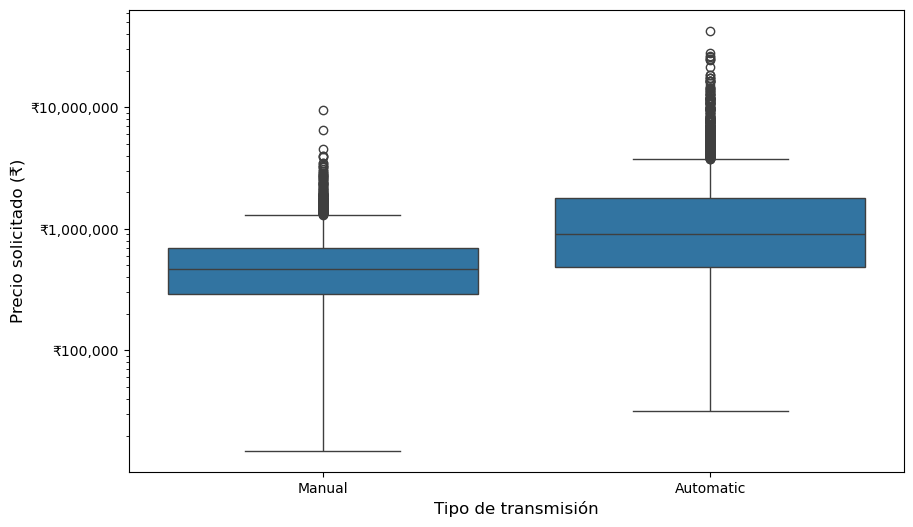

In [8]:
#le doy formato al eje y para que no aparezca el formato logaritmico
def log_formatter(x, pos):
    return f'₹{int(x):,}'

plt.figure(figsize =(10,6)) 
sns.boxplot(y="AskPrice", x="Transmission", data=df)
plt.xlabel('Tipo de transmisión', fontsize=12)
plt.ylabel('Precio solicitado (₹)', fontsize=12)
plt.yscale('log') 

#darle formato de rupia india de vuelta al eje y
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_formatter))



# ¿Que tipo de transmisión es más usada con el pasar de los años?

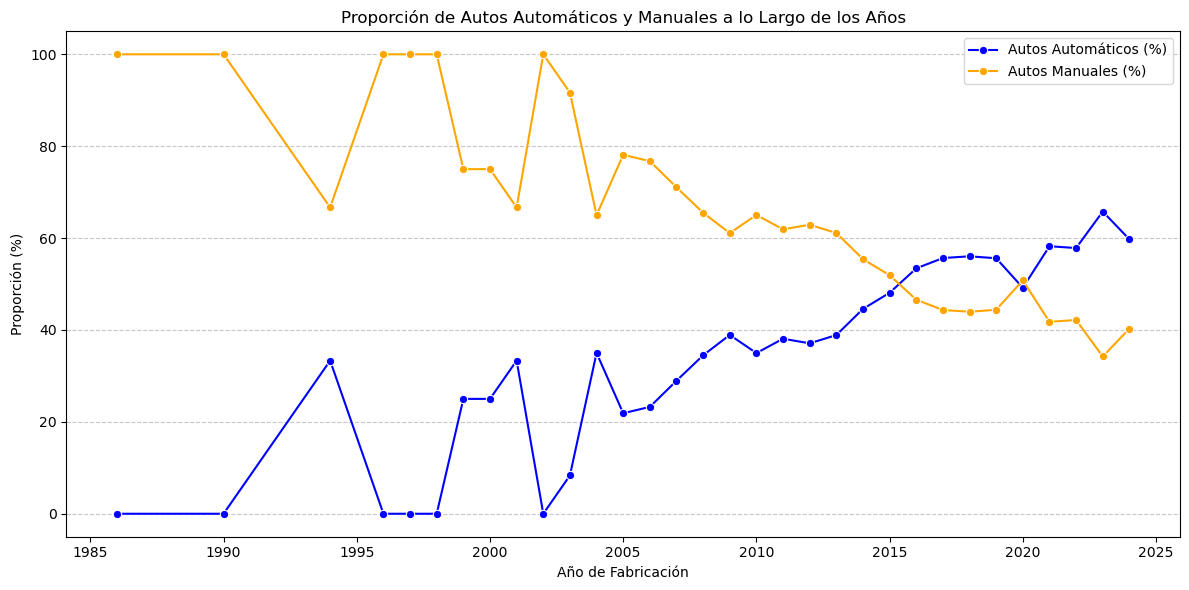

In [9]:
# Agrupar los datos por 'Year' y contar la proporción de transmisiones
transmission_trend = df.groupby(['Year', 'Transmission']).size().unstack(fill_value=0)
transmission_trend['Total'] = transmission_trend.sum(axis=1)
transmission_trend['Automatic%'] = (transmission_trend.get('Automatic', 0) / transmission_trend['Total']) * 100
transmission_trend['Manual%'] = (transmission_trend.get('Manual', 0) / transmission_trend['Total']) * 100

# Graficar la proyección que tuvo cada tipo de transmisión
plt.figure(figsize=(12, 6))
sns.lineplot(data=transmission_trend, x=transmission_trend.index, y='Automatic%', marker='o', label="Autos Automáticos (%)", color='blue')
sns.lineplot(data=transmission_trend, x=transmission_trend.index, y='Manual%', marker='o', label="Autos Manuales (%)", color='orange')
plt.title("Proporción de Autos Automáticos y Manuales a lo Largo de los Años")
plt.xlabel("Año de Fabricación")
plt.ylabel("Proporción (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# ¿Cual es la marca que mas autos con transmision automatica y manual tiene? 

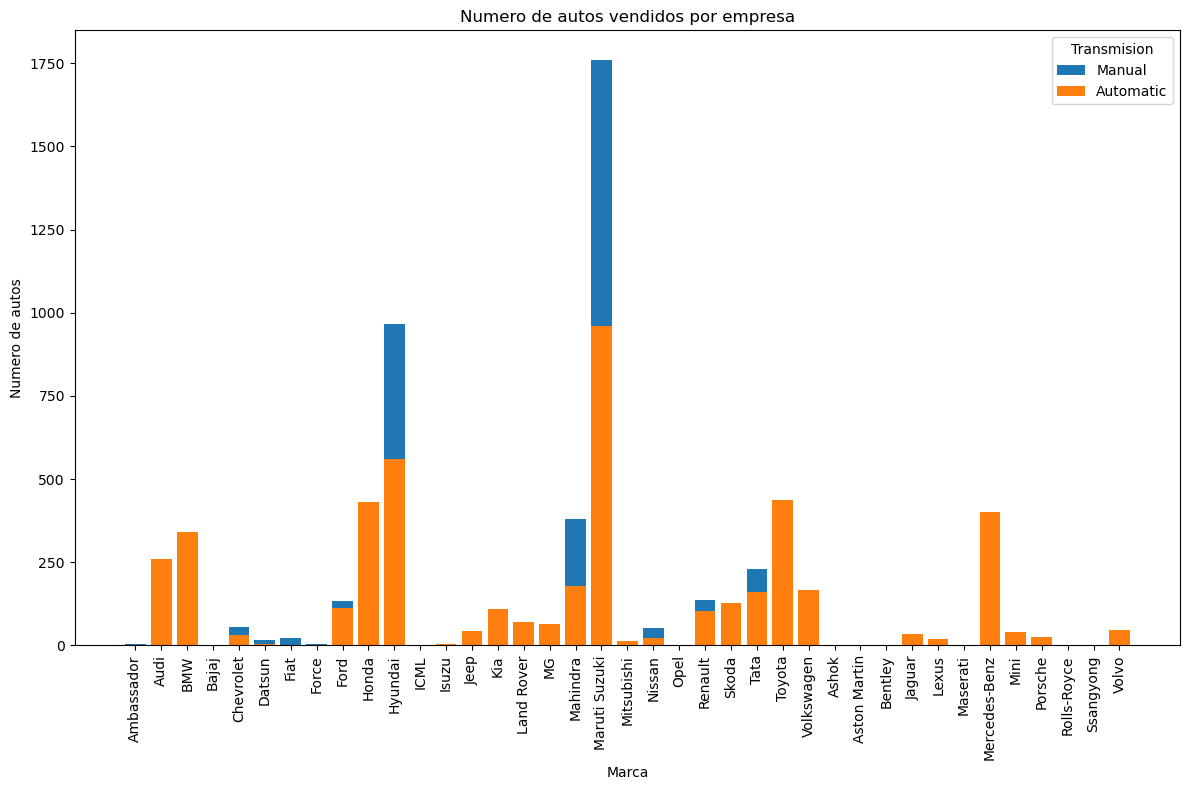

In [10]:
# agrupar(contar) por tipo de transmision y marca
grouped_df = df.groupby(['Brand', 'Transmission']).size().reset_index(name='Count')

# Dibujar la informacion iterando cada tipo de transmision 
plt.figure(figsize=(12, 8))
for transmission in grouped_df['Transmission'].unique():
    subset = grouped_df[grouped_df['Transmission'] == transmission]
    plt.bar(subset['Brand'], subset['Count'], label=transmission)

plt.xlabel('Marca')
plt.ylabel('Numero de autos')
plt.title('Numero de autos vendidos por empresa')
plt.legend(title='Transmision')
plt.xticks(rotation=90)
plt.tight_layout()


In [11]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [12]:
calcular_outliers_iqr(df)

,Columna,Porcentaje_Outliers
0,AskPrice,9.340430
1,kmDriven,4.164058
2,Year,1.450637
3,Age,1.450637


# No se presentan grandes Outliers, por ende no es necesario hacer reemplazos o analizar a fondo en este paso.

# Preparación de datos para procesarlos
Se ve que hay muchos tipos de datos object, por ende tenemos que realizar un One Hot Encoding o un Label Encoding según corresponda.

In [13]:
def preprocesar_data(data):
    """
    Función para preprocesar los datos.
    - Realiza One Hot Encoding en variables categóricas con <= 8 categorías.
    - Realiza Label Encoding en variables categóricas con > 8 categorías.
    - Normaliza las variables numéricas entre 0 y 1.
    """
    # Inicializamos los transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Cambié sparse a sparse_output
    label_encoder = LabelEncoder()
    scaler = MinMaxScaler()

    # Variables categóricas y numéricas
    categorias = data.select_dtypes(include=['object']).columns
    numericas = data.select_dtypes(exclude=['object']).columns

    # Aplicamos One Hot Encoding o Label Encoding según corresponda
    for col in categorias:
        if data[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out([col]))
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            data[col] = label_encoder.fit_transform(data[col])

    # Normalizamos las variables numéricas
    # Inicializar los escaladores
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Iterar sobre las columnas numéricas y aplicar el escalado apropiado
    for col in numericas:
        # Calcular skewness de la columna
        skewness = skew(df[col].dropna())  # Ignorar valores NaN si los hay

        # Escalar dependiendo del skewness
        if abs(skewness) > 1:
            # Si el skewness es alto, usamos MinMaxScaler
            data[col] = minmax_scaler.fit_transform(data[[col]])
        else:
            # Si el skewness es bajo, usamos StandardScaler
            data[col] = standard_scaler.fit_transform(data[[col]])

    return data

In [18]:
df_preprocesado = preprocesar_data(df)

In [20]:
df_preprocesado.head()

,Brand,model,Year,Age,kmDriven,PostedDate,AdditionInfo,AskPrice,Transmission_Manual,Owner_second,FuelType_Hybrid/CNG,FuelType_Petrol
0,-0.976760,-0.955781,-3.758514,3.758514,0.100000,9,1270,0.004237,1.0,1.0,0.0,1.0
1,1.607704,-0.107588,-1.801094,1.801094,0.193877,5,6728,0.008474,1.0,1.0,0.0,0.0
2,1.715391,1.209994,-1.556416,1.556416,0.078822,9,7151,0.004001,1.0,0.0,0.0,0.0
3,0.207786,0.962947,0.156326,-0.156326,0.085204,9,4515,0.012946,1.0,1.0,0.0,0.0
4,0.207786,-1.219298,0.645681,-0.645681,0.045918,9,3635,0.015770,0.0,0.0,0.0,1.0


In [23]:
df_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                9582 non-null   float64
 1   model                9582 non-null   float64
 2   Year                 9582 non-null   float64
 3   Age                  9582 non-null   float64
 4   kmDriven             9582 non-null   float64
 5   PostedDate           9582 non-null   int32  
 6   AdditionInfo         9582 non-null   int32  
 7   AskPrice             9582 non-null   float64
 8   Transmission_Manual  9582 non-null   float64
 9   Owner_second         9582 non-null   float64
 10  FuelType_Hybrid/CNG  9582 non-null   float64
 11  FuelType_Petrol      9582 non-null   float64
dtypes: float64(10), int32(2)
memory usage: 823.6 KB


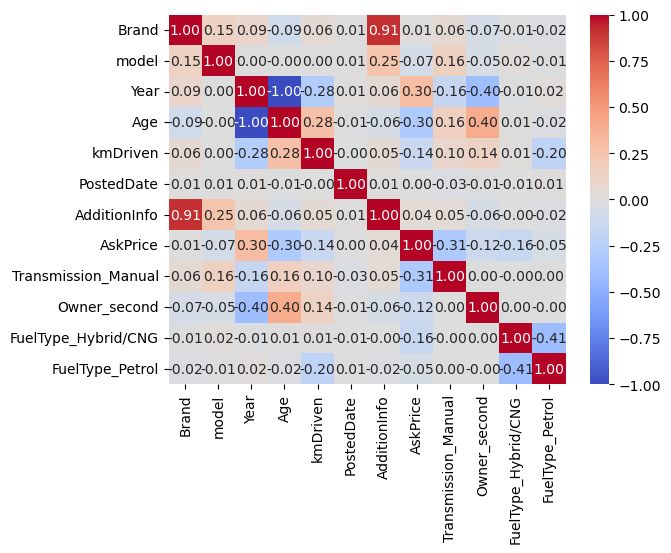

In [28]:
numeric_data = df_preprocesado.select_dtypes(include=["float", 'float64', "int32", "int"])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap ='coolwarm')
plt.show()

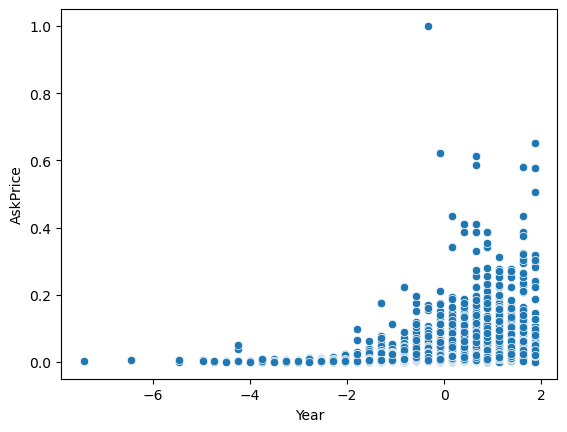

In [42]:
# Gráfico de dispersión entre algunas variables
sns.scatterplot(data=df_preprocesado, x="Year", y="AskPrice")
plt.show()

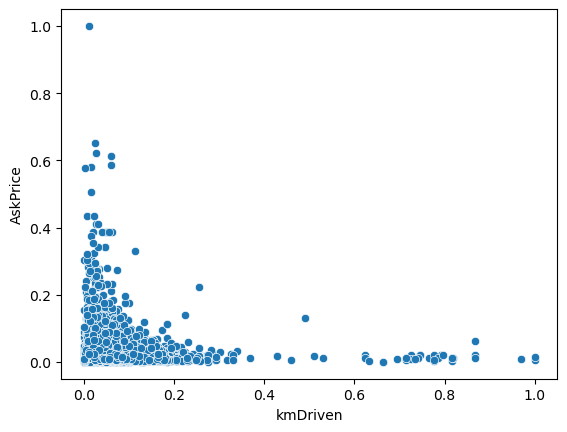

In [43]:
# Gráfico de dispersión entre algunas variables
sns.scatterplot(data=df_preprocesado, x="kmDriven", y="AskPrice")
plt.show()

In [44]:
X = df_preprocesado[['Year', 'kmDriven']].copy()
y = df_preprocesado['AskPrice'].copy()

In [45]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "R^2", "MAE", "MSE", "RMSE", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [49]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'R^2': [r2],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    # Eliminar columnas vacías o todas NA
    resultados_df = resultados_df.dropna(axis=1, how='all')

    return resultados_df

In [50]:
def plot_predictions_vs_actuals(y_test, y_pred):
    # Crear un DataFrame con las predicciones y los valores reales
    df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

    # Establecer el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el gráfico de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Real', y='Predicted', color='blue', alpha=0.6, label='Predicciones', s=80)

    # Añadir la línea de referencia y=x
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea y=x')

    # Añadir título y etiquetas
    plt.title('Valores Reales vs Predicciones', fontsize=12)
    plt.xlabel('Valores Reales', fontsize=10)
    plt.ylabel('Predicciones', fontsize=10)

    # Mostrar la leyenda y la cuadrícula
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [51]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Gráfico para evaluar las predicciones
    plot_predictions_vs_actuals(y_test, y_pred)

In [52]:
modelo = LinearRegression()

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Resultados para el modelo: Regresión Lineal
             Modelo       R^2       MAE       MSE      RMSE    Tiempo
0  Regresión Lineal  0.106984  0.018232  0.001326  0.036417  0.003001 



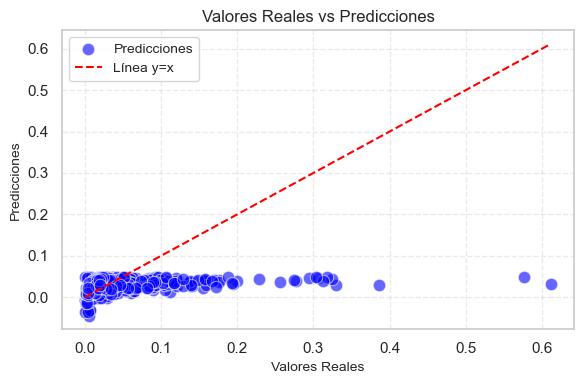

In [58]:
entrenar_modelo(modelo, 'Regresión Lineal', X_train, y_train, X_test, y_test)

In [61]:
modelo = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=9999
)

Resultados para el modelo: Árbol de Decisión
              Modelo       R^2       MAE       MSE      RMSE   Tiempo
0  Árbol de Decisión  0.115435  0.017875  0.001314  0.036244  0.01054 



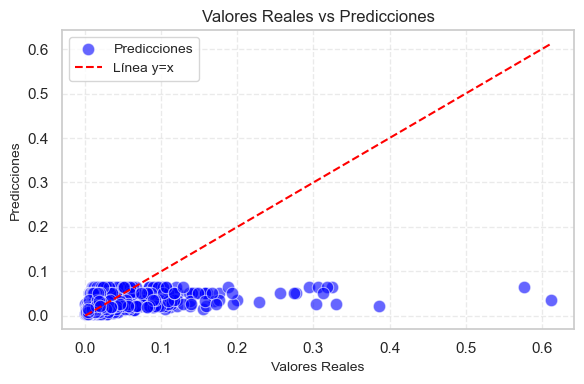

In [62]:
entrenar_modelo(modelo, 'Árbol de Decisión', X_train, y_train, X_test, y_test)

In [63]:
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=9999
)

Resultados para el modelo: Random Forest
          Modelo       R^2      MAE       MSE      RMSE    Tiempo
0  Random Forest  0.032911  0.01792  0.001436  0.037897  0.505178 



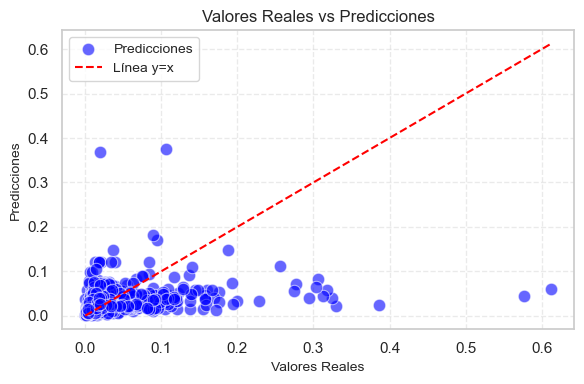

In [64]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

In [66]:
modelo = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=9999
)

Resultados para el modelo: Gradient Boosting
              Modelo       R^2       MAE       MSE     RMSE    Tiempo
0  Gradient Boosting  0.014317  0.017873  0.001464  0.03826  0.264571 



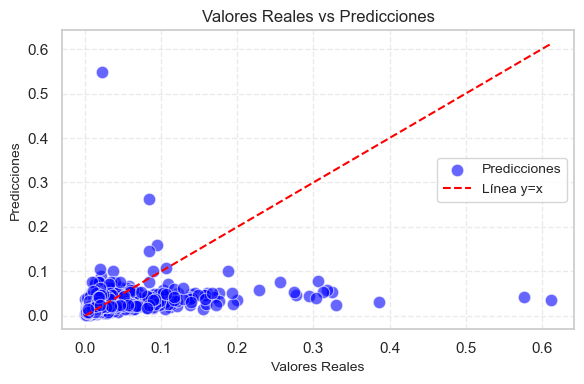

In [67]:
entrenar_modelo(modelo, 'Gradient Boosting', X_train, y_train, X_test, y_test)

In [68]:
calcular_outliers_iqr(df_preprocesado)

,Columna,Porcentaje_Outliers
0,AskPrice,9.340430
1,PostedDate,9.277813
2,kmDriven,4.164058
3,Year,1.450637
4,Age,1.450637


In [72]:
# Calcular los cuartiles y el rango intercuartílico (IQR) para la columna 'price'
Q1 = df_preprocesado['AskPrice'].quantile(0.25)
Q3 = df_preprocesado['AskPrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_cleaned = df_preprocesado[(df_preprocesado['AskPrice'] >= lower_bound) & (df_preprocesado['AskPrice'] <= upper_bound)]

# Mostrar la cantidad de registros antes y después de eliminar los outliers
print(f"Registros antes de eliminar outliers: {len(df_preprocesado)}")
print(f"Registros después de eliminar outliers: {len(df_cleaned)}")

Registros antes de eliminar outliers: 9582
Registros después de eliminar outliers: 8687


In [75]:
# X será todo menos la columna 'Status' (la target)
X = df_cleaned.drop(columns=['AskPrice'])

# y será la columna 'Status' (la target)
y = df_cleaned['AskPrice']

# Realizamos el split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Resultados para el modelo: Gradient Boosting - sin outliers
                             Modelo       R^2       MAE       MSE      RMSE  \
0  Gradient Boosting - sin outliers  0.766557  0.003762  0.000028  0.005256   

     Tiempo  
0  0.643876   



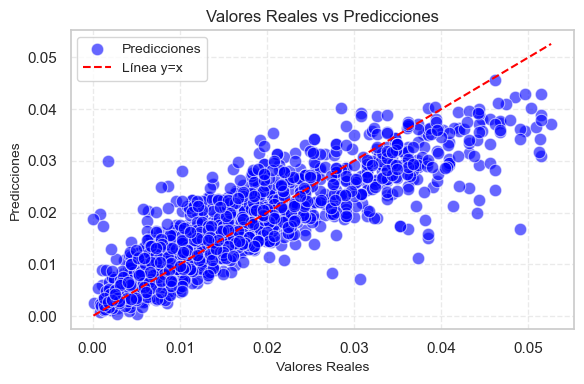

In [76]:
entrenar_modelo(modelo, 'Gradient Boosting - sin outliers', X_train, y_train, X_test, y_test)

In [77]:
resultados_df

,Modelo,R^2,MAE,MSE,RMSE,Tiempo
0,Regresión Lineal,0.106984,0.018232,0.001326,0.036417,0.002505
1,Regresión Lineal,0.106984,0.018232,0.001326,0.036417,0.003001
2,Árbol de Decisión,0.115435,0.017875,0.001314,0.036244,0.010540
3,Random Forest,0.032911,0.017920,0.001436,0.037897,0.505178
4,Gradient Boosting,0.014317,0.017873,0.001464,0.038260,0.264571
5,Gradient Boosting - sin outliers,0.014317,0.017873,0.001464,0.038260,0.282793
6,Gradient Boosting - sin outliers,0.766557,0.003762,0.000028,0.005256,0.643876


In [95]:
modelo = LinearRegression()

Resultados para el modelo: Regresión Lineal - sin outliers
                            Modelo      R^2       MAE      MSE      RMSE  \
0  Regresión Lineal - sin outliers  0.49045  0.005986  0.00006  0.007765   

     Tiempo  
0  0.022046   



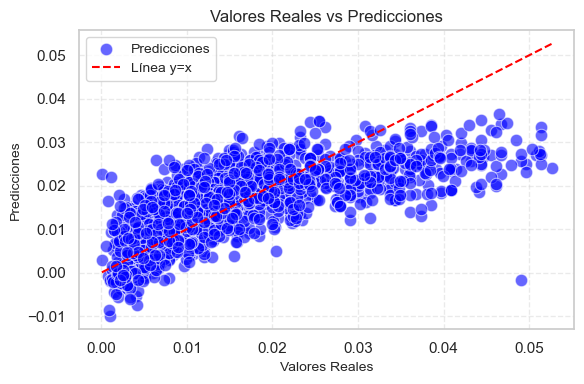

In [96]:
entrenar_modelo(modelo, 'Regresión Lineal - sin outliers', X_train, y_train, X_test, y_test)

In [83]:
modelo = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=5,
    random_state=9999
)

Resultados para el modelo: Árbol de Decisión - sin outliers
                             Modelo       R^2       MAE       MSE     RMSE  \
0  Árbol de Decisión - sin outliers  0.516978  0.005391  0.000057  0.00756   

     Tiempo  
0  0.012012   



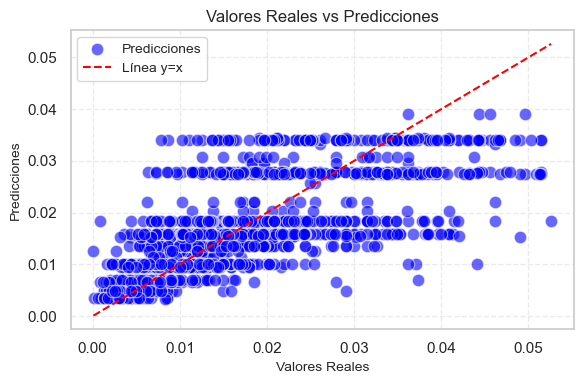

In [84]:
entrenar_modelo(modelo, 'Árbol de Decisión - sin outliers', X_train, y_train, X_test, y_test)

In [85]:
modelo = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=9999
)

Resultados para el modelo: Random Forest - sin outliers
                         Modelo       R^2       MAE       MSE      RMSE  \
0  Random Forest - sin outliers  0.815441  0.003119  0.000022  0.004673   

     Tiempo  
0  1.304097   



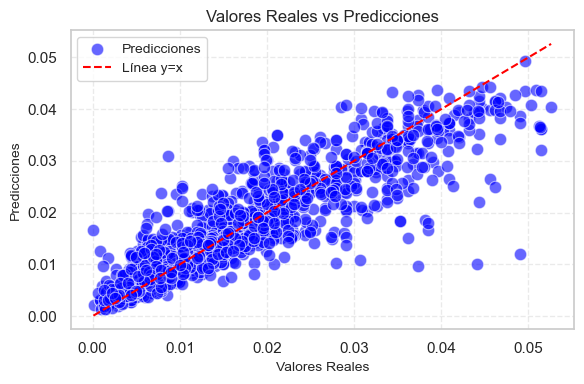

In [87]:
entrenar_modelo(modelo, 'Random Forest - sin outliers', X_train, y_train, X_test, y_test)

In [100]:
resultados_df

,Modelo,R^2,MAE,MSE,RMSE,Tiempo
0,Regresión Lineal,0.106984,0.018232,0.001326,0.036417,0.003001
1,Árbol de Decisión,0.115435,0.017875,0.001314,0.036244,0.010540
2,Random Forest,0.032911,0.017920,0.001436,0.037897,0.505178
3,Gradient Boosting,0.014317,0.017873,0.001464,0.038260,0.264571
4,Gradient Boosting - sin outliers,0.766557,0.003762,0.000028,0.005256,0.643876
6,Árbol de Decisión - sin outliers,0.516978,0.005391,0.000057,0.007560,0.012012
7,Random Forest - sin outliers,0.815441,0.003119,0.000022,0.004673,1.304097
8,Regresión Lineal - sin outliers,0.490450,0.005986,0.000060,0.007765,0.022046


# Evaluación de Modelos con Outliers

## Regresión Lineal

R² = 0.106984: Indica una baja capacidad explicativa del modelo.

MAE = 0.018232: El error absoluto medio sugiere que las predicciones tienen una desviación significativa respecto a los valores reales.

RMSE = 0.036417: Confirma una baja precisión del modelo.

Tiempo de ejecución = 0.003001 segundos: Es el modelo más rápido, pero con una baja capacidad predictiva.

## Árbol de Decisión

R² = 0.115435: Ligeramente mejor que la regresión lineal, pero sigue siendo bajo.

MAE = 0.017875: Similar a la regresión lineal, indicando que el modelo no es lo suficientemente preciso.

RMSE = 0.036244: Indica una baja efectividad en las predicciones.

Tiempo de ejecución = 0.010540 segundos: Algo más lento, pero sigue siendo rápido.

## Random Forest

 R² = 0.032911: Muy bajo, lo que indica que el modelo no captura la relación entre las variables correctamente.

 MAE = 0.017920, RMSE = 0.037897: Errores elevados, mostrando que el modelo no mejora respecto a otros.

 Tiempo de ejecución = 0.505178 segundos: Tiempo de procesamiento considerablemente mayor sin una mejora significativa en el rendimiento.

## Gradient Boosting

 R² = 0.014317: Peor rendimiento de todos los modelos.

 MAE = 0.017873, RMSE = 0.038260: Errores elevados.

Tiempo de ejecución = 0.264571 segundos: Relativamente alto sin mejorar la predicción.

### Conclusión inicial: Todos los modelos presentan desempeños deficientes con outliers, lo que sugiere que los valores atípicos están afectando negativamente las predicciones.



# Evaluación de Modelos Sin Outliers

## Gradient Boosting - Sin Outliers

 R² = 0.766557: Gran mejora, lo que indica que el modelo ahora explica mejor la variabilidad en los datos.

 MAE = 0.005986, RMSE = 0.005256: Los errores se reducen drásticamente, lo que sugiere una mejora en la precisión del modelo.

Tiempo de ejecución = 0.643876 segundos: Aumento en el tiempo de cálculo, pero con una mejora considerable en la predicción.

## Regresión Lineal - Sin Outliers

 R² = 0.490450: Gran mejora pero no llega a alcanzar al menos un 0.75, por ende no es el mejor modelo para predecir este dataset.

 MAE = 0.003762, RMSE = 0.007765: Precisión significativamente desarcetada.

 Tiempo de ejecución = 0.022046 segundos: Aumento respecto a la versión con outliers, pero sigue siendo muy rápido.

## Árbol de Decisión - Sin Outliers

 R² = 0.516978: Aumento significativo en la capacidad explicativa.

 MAE = 0.005391, RMSE = 0.007560: Menos preciso que los anteriores, pero mejora respecto a la versión con outliers.

 Tiempo de ejecución = 0.012012 segundos: Se mantiene rápido.

## Random Forest - Sin Outliers

 R² = 0.815441: Mejor rendimiento general.

 MAE = 0.003119, RMSE = 0.004673: Mínimos errores, lo que lo hace el modelo más preciso.

 Tiempo de ejecución = 1.304097 segundos: El modelo más costoso en cálculo, pero con la mejor capacidad predictiva.



# Conclusiones Finales

### Impacto de los outliers: Se observa una mejora drástica en la capacidad predictiva tras eliminarlos.

### Mejor modelo: Random Forest sin outliers obtiene el mayor R² (0.815441) y los menores errores, aunque con el mayor costo computacional.

Conclusión general:La eliminación de outliers es un paso crucial para mejorar la calidad de los modelos de Machine Learning. Los resultados demuestran que la presencia de valores extremos distorsiona las predicciones y reduce la capacidad explicativa.
